# WeatherPy Analysis - Observable Trends
----

By Tim St. Onge

1. The analysis of maximum temperature in relationship to latitude shows that while locations farther from the Equator reported generally decreasing maximum temperatures, the relationship is not as simple as greater latitude difference meaning lower temperature. The positive latitudes over 0 (representing the northern hemisphere) show largely decreasing temperatures with increasing latitude, but the negative latitudes (southern hemisphere) shows temperatures only moderately decreasing from those at the Equator; the drop is not nearly as sharp as it is for northern hemisphere locales. As this analysis was initially done in January (northern hemisphere winter, southern hemisphere summer), we can see how southern hemisphere temperatures did not drop as sigificantly as northern hemisphere temperatures from those at the Equator.

2. There was no clear relationship found between the latitude and either humidity or cloudiness. In both graphs, there was a wide array of cloudiness percentages found across all latitudes. This indicates that, at least for January, there is no connection between distance from the Equator and recorded cloudiness or humidity. Since the humidity measure cannot logically be above 100%, we are assuming that the extreme outliers (at least two points near the 300% mark) must be the result of some measurement error at those locations and not valid data points.

3. While there are numerous data points that do not fit this trend, the relationship between latitude and wind speed, as shown in the final scatterplot, may be that locations further from the Equator experience increase wind speeds. While the bulk of weather recordings measured wind speeds below 10 mph, upper outliers are mostly concentrated towards the upper-latitude extremes of both the southern and northern hemispheres. Despite this, the connection between these variables is not nearly as strong as the trend between latitude and maximum temperature.


In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output files for cities list and weather data
output_cities_file = "output_data/cities.csv"
output_weather_file = "output_data/weather.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the length of the cities list, confirming that we have at least 500 cities.
print(len(cities))

# Convert the cities list to a dataframe, and then output the dataframe to a CSV, storing the cities.
cities_df = pd.DataFrame({"City": cities})
cities_df.to_csv(output_cities_file)
        
# Show the list of cities
cities

599


['gusau',
 'ushuaia',
 'paamiut',
 'kamenskoye',
 'mvuma',
 'ribeira grande',
 'albany',
 'janauba',
 'new norfolk',
 'tuktoyaktuk',
 'poum',
 'attawapiskat',
 'yellowknife',
 'alofi',
 'castro',
 'lagoa',
 'bluff',
 'punta arenas',
 'dunedin',
 'upernavik',
 'baghdad',
 'tiksi',
 'chokurdakh',
 'dalinghe',
 'taolanaro',
 'luau',
 'vaini',
 'hamilton',
 'flin flon',
 'rikitea',
 'kavieng',
 'necochea',
 'avarua',
 'bandar-e anzali',
 'esperance',
 'babynino',
 'palmerston north',
 'grindavik',
 'kloulklubed',
 'dikson',
 'cherskiy',
 'palamos',
 'hofn',
 'constitucion',
 'palabuhanratu',
 'lata',
 'daguit',
 'severo-yeniseyskiy',
 'nanortalik',
 'saint-georges',
 'katsuura',
 'talnakh',
 'ancud',
 'jamestown',
 'belushya guba',
 'lorengau',
 'berlevag',
 'skjervoy',
 'guerrero negro',
 'azovo',
 'biograd na moru',
 'broken hill',
 'srednekolymsk',
 'riyadh',
 'butaritari',
 'klaksvik',
 'georgetown',
 'tasiilaq',
 'shieli',
 'hun',
 'quang ngai',
 'lavrentiya',
 'kaitangata',
 'hobart'

### Perform API Calls

In [87]:
# Set query information for the OpenWeatherAPI
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key

# Establish two counters that will increment in the API data pull.
record_num = 1
set_num = 1

# Establish an empty list that will hold the API data returns
response_list = []


# Format text marking the beginning of data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")

# For every city in the cities list, look up that city's weather in the API, pull the data, and append it to the...
# ..."response_list". If the city is not in the OpenWeatherAPI, remove the error entry from the "response_list."... 
# ...Along the way, print the processing results with incrementing record and set number, and...
# ...state "City not found" when the city is not found in the OpenWeatherAPI.
for x in cities:
    query_url = url + "appid=" + api_key + "&q=" + x
    weather_response = requests.get(query_url).json()
    time.sleep(2)
    
    try:
        response_list.append(weather_response)
        print(f"Processing Record {record_num} of Set {set_num} | {weather_response['name']}")

        record_num = record_num + 1
        if record_num == 51:
            set_num = set_num + 1
            record_num = 1    
    except (KeyError, IndexError, NameError):
        print("City not found. Skipping...")
        response_list.remove(weather_response)
    

# When the cities list has been fully crunched, print that the process is complete.
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Gusau
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Paamiut
City not found. Skipping...
Processing Record 4 of Set 1 | Mvuma
Processing Record 5 of Set 1 | Ribeira Grande
Processing Record 6 of Set 1 | Albany
Processing Record 7 of Set 1 | Janauba
Processing Record 8 of Set 1 | New Norfolk
Processing Record 9 of Set 1 | Tuktoyaktuk
Processing Record 10 of Set 1 | Poum
City not found. Skipping...
Processing Record 11 of Set 1 | Yellowknife
Processing Record 12 of Set 1 | Alofi
Processing Record 13 of Set 1 | Castro
Processing Record 14 of Set 1 | Lagoa
Processing Record 15 of Set 1 | Bluff
Processing Record 16 of Set 1 | Punta Arenas
Processing Record 17 of Set 1 | Dunedin
Processing Record 18 of Set 1 | Upernavik
Processing Record 19 of Set 1 | Baghdad
Processing Record 20 of Set 1 | Tiksi
Processing Record 21 of Set 1 | Chokurdakh
City not found. Skipping...
City not found. Sk

Processing Record 36 of Set 4 | Te Anau
Processing Record 37 of Set 4 | Salalah
City not found. Skipping...
Processing Record 38 of Set 4 | Neuquen
Processing Record 39 of Set 4 | Kardla
Processing Record 40 of Set 4 | Codrington
City not found. Skipping...
Processing Record 41 of Set 4 | San Quintin
Processing Record 42 of Set 4 | Manjacaze
City not found. Skipping...
Processing Record 43 of Set 4 | Dingle
Processing Record 44 of Set 4 | Norman Wells
Processing Record 45 of Set 4 | East Haven
Processing Record 46 of Set 4 | Leningradskiy
Processing Record 47 of Set 4 | Kazerun
Processing Record 48 of Set 4 | Muyezerskiy
City not found. Skipping...
Processing Record 49 of Set 4 | Sisimiut
Processing Record 50 of Set 4 | Koslan
Processing Record 1 of Set 5 | Bukachacha
Processing Record 2 of Set 5 | La Peca
Processing Record 3 of Set 5 | Cockburn Town
Processing Record 4 of Set 5 | East London
Processing Record 5 of Set 5 | Jeremie
Processing Record 6 of Set 5 | Belaya Gora
Processing R

Processing Record 16 of Set 8 | Yarke Pole
Processing Record 17 of Set 8 | Saint-Augustin
Processing Record 18 of Set 8 | Krasnovishersk
Processing Record 19 of Set 8 | Filadelfia
Processing Record 20 of Set 8 | Otuzco
Processing Record 21 of Set 8 | Quelimane
Processing Record 22 of Set 8 | Toora-Khem
Processing Record 23 of Set 8 | Nisia Floresta
Processing Record 24 of Set 8 | Verkhnyaya Inta
Processing Record 25 of Set 8 | Changji
Processing Record 26 of Set 8 | Geraldton
Processing Record 27 of Set 8 | Maceio
Processing Record 28 of Set 8 | Sao Jose da Coroa Grande
Processing Record 29 of Set 8 | Mogadishu
City not found. Skipping...
Processing Record 30 of Set 8 | Indiana
Processing Record 31 of Set 8 | Mnogovershinnyy
Processing Record 32 of Set 8 | Arman
Processing Record 33 of Set 8 | Manado
Processing Record 34 of Set 8 | Havoysund
City not found. Skipping...
Processing Record 35 of Set 8 | Tilichiki
Processing Record 36 of Set 8 | Leh
Processing Record 37 of Set 8 | Ati
Proc

In [88]:
# Preview the resulting "response_list" by printing the first 10 items (dictionaries).
response_list[:10]

[{'coord': {'lon': 6.66, 'lat': 12.17},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 298.856,
   'pressure': 967.42,
   'humidity': 30,
   'temp_min': 298.856,
   'temp_max': 298.856,
   'sea_level': 1022.3,
   'grnd_level': 967.42},
  'wind': {'speed': 2.12, 'deg': 345.503},
  'clouds': {'all': 0},
  'dt': 1548615572,
  'sys': {'message': 0.0035,
   'country': 'NG',
   'sunrise': 1548568736,
   'sunset': 1548610416},
  'id': 2339937,
  'name': 'Gusau',
  'cod': 200},
 {'coord': {'lon': -68.31, 'lat': -54.81},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 289.15,
   'pressure': 987,
   'humidity': 38,
   'temp_min': 289.15,
   'temp_max': 289.15},
  'visibility': 10000,
  'wind': {'speed': 11.3, 'deg': 290},
  'clouds': {'all': 75},
  'dt': 1548612000,
  'sys': {'type': 1,
   'id': 8303,
   'm

### Convert Raw Data to DataFrame

In [89]:
# Pull each data variable for each city from "response_list" (list of dictionaries of weather data).
city = [li['name'] for li in response_list]
cloudiness = [li['clouds']['all'] for li in response_list]
country = [li['sys']['country'] for li in response_list]
date = [li['dt'] for li in response_list]
humidity = [li['main']['humidity'] for li in response_list]
lat = [li['coord']['lat'] for li in response_list]
lon = [li['coord']['lon'] for li in response_list]
maxtemp = [(li['main']['temp_max'])*(9/5)-459.67 for li in response_list]
windspeed = [li['wind']['speed'] for li in response_list]

# Write each list of weather data variables into a dataframe.
weather_df = pd.DataFrame({"City": city, 
                           "Cloudiness": cloudiness, 
                           "Country": country,
                           "Date": date, 
                           "Humidity": humidity,
                           "Lat": lat,
                           "Lng": lon,
                           "Max Temp": maxtemp,
                           "Wind Speed": windspeed})

# Preview the "weather_df" dataframe.
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gusau,0,NG,1548615572,30,12.17,6.66,78.2708,2.12
1,Ushuaia,75,AR,1548612000,38,-54.81,-68.31,60.8000,11.30
2,Paamiut,80,GL,1548615576,100,61.99,-49.67,26.0258,11.62
3,Mvuma,36,ZW,1548615581,69,-19.28,30.53,69.6758,5.67
4,Ribeira Grande,75,PT,1548612000,77,38.52,-28.70,60.8000,4.10


In [90]:
# Output the "weather_df" dataframe to a CSV in the filepath defined in "output_data_file" variable.
weather_df.to_csv(output_weather_file)

### Plotting the Data

#### Latitude vs. Temperature Plot

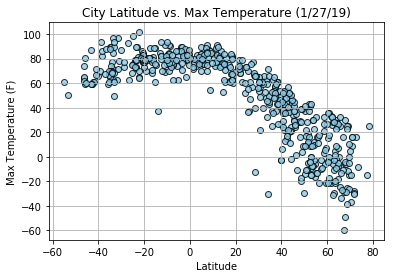

In [91]:
# Create scatterplot with the latitude and max. temperature variables, drawn to the defined graph parameters.
plt.scatter(lat, 
            maxtemp, 
            c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Add plot title, axis labels, and grid
plt.title("City Latitude vs. Max Temperature (1/27/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the resulting max. temperature scatterplot
plt.savefig("output_data/maxtemp.png")


#### Latitude vs. Humidity Plot

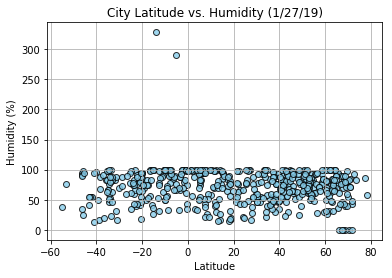

In [92]:
# Create scatterplot with the latitude and humidity variables, drawn to the defined graph parameters.
plt.scatter(lat, 
            humidity, 
            c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Add plot title, axis labels, and grid
plt.title("City Latitude vs. Humidity (1/27/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the resulting humidity scatterplot
plt.savefig("output_data/humidity.png")


#### Latitude vs. Cloudiness Plot

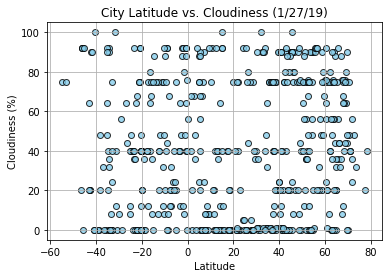

In [93]:
# Create scatterplot with the latitude and cloudiness variables, drawn to the defined graph parameters.
plt.scatter(lat, 
            cloudiness, 
            c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Add plot title, axis labels, and grid
plt.title("City Latitude vs. Cloudiness (1/27/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the resulting cloudiness scatterplot
plt.savefig("output_data/cloudiness.png")

#### Latitude vs. Wind Speed Plot

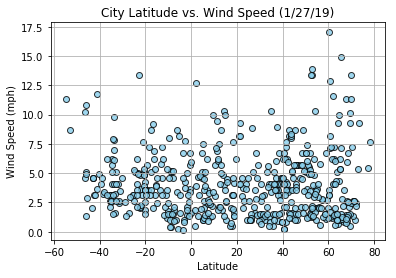

In [94]:
# Create scatterplot with the latitude and wind speed variables, drawn to the defined graph parameters.
plt.scatter(lat, 
            windspeed, 
            c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Add plot title, axis labels, and grid
plt.title("City Latitude vs. Wind Speed (1/27/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the resulting wind speed scatterplot
plt.savefig("output_data/windspeed.png")
